<a href="https://colab.research.google.com/github/vlvt/pca-for-marketing/blob/main/PCA_Explainer_AdData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
# Step 1: Simulated dataset with marketing metrics
data = {
    'ROAS': [3.2, 2.8, 3.5, 3.0, 2.9, 3.4, 2.7, 3.1, 2.5, 3.3],
    'CTR': [2.1, 2.5, 2.4, 2.2, 2.7, 2.3, 2.0, 2.6, 2.4, 2.3],
    'CAC': [15, 18, 13, 16, 17, 14, 20, 15, 19, 14],
    'BounceRate': [65, 70, 63, 67, 68, 66, 72, 69, 74, 64],
    'TimeOnSite': [45, 39, 48, 42, 41, 44, 36, 43, 37, 46],
    'LTV': [210, 190, 225, 205, 200, 220, 185, 210, 180, 215]
}

df = pd.DataFrame(data)

In [8]:
# Step 2: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [9]:
# Step 3: Run PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

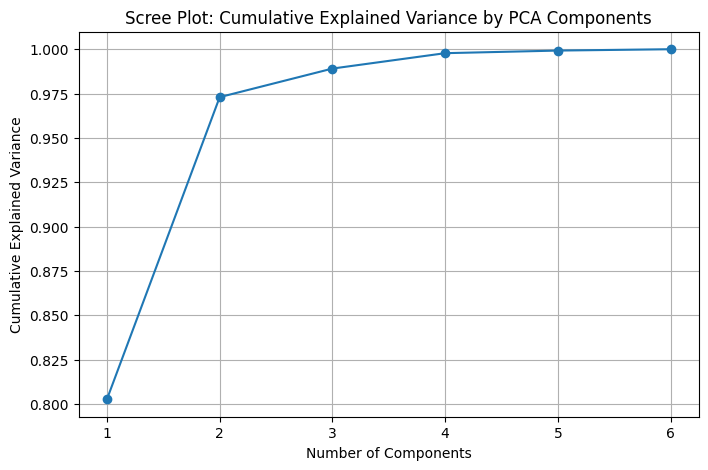

In [10]:
# Step 4: Create Scree Plot
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.title('Scree Plot: Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

### 📈 Scree Plot: How many components do we actually need?

This chart shows the **cumulative explained variance** — how much of the total information in the dataset is captured by the first *n* principal components.

Let’s break it down:

- **PC1 explains ~80%** of all variance. That means just one component already captures most of the structure in the data.
- **PC1 + PC2 explain ~97%**. Adding the second component (CTR-driven) gives us almost a complete picture.
- **From PC3 onward**, each additional component adds very little new information (less than ~2% each).

#### 🔍 So what does it mean?

💡 You don’t need all 6 features to understand what's happening in the data.  
**Two components are enough to summarize everything with ~97% accuracy.**

This is the power of PCA:

- It reduces complexity.
- It reveals the **true dimensions** behind performance.
- It shows what features actually **drive differences** between campaigns or segments.

In [12]:
# Step 5: Component Loadings (Feature Importance in each Component)
components = pd.DataFrame(pca.components_, columns=df.columns)
components.index = [f'PC{i+1}' for i in range(len(components))]

# Display the component weights
components_rounded = components.round(2)

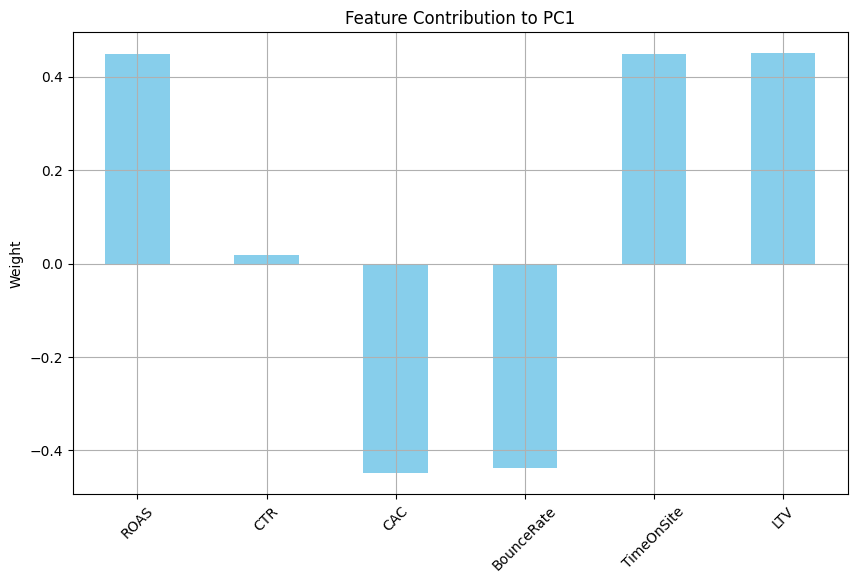

In [20]:
# Step 6: Visualize Feature Loadings for PC1 and PC2
plt.figure(figsize=(10, 6))
components.loc['PC1'].plot(kind='bar', color='skyblue')
plt.title('Feature Contribution to PC1')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 📊 Interpretation of Principal Component 1 (PC1)

This chart shows how much each feature contributes to the first principal component (PC1) in PCA analysis.

#### 🔍 Key Observations:

- **Strong positive weights:**
  - `ROAS` ≈ +0.45  
  - `TimeOnSite` ≈ +0.45  
  - `LTV` ≈ +0.45

- **Strong negative weights:**
  - `CAC` ≈ –0.45  
  - `BounceRate` ≈ –0.45

- **Near zero weight:**
  - `CTR` ≈ 0

#### 🧠 Interpretation:

PC1 can be interpreted as a **contrast between value and loss**:

| Metric        | Weight | Meaning                                  |
|---------------|--------|-------------------------------------------|
| ROAS          | +      | Higher = better return on ad spend       |
| TimeOnSite    | +      | Higher = users stay longer                |
| LTV           | +      | Higher customer lifetime value            |
| CAC           | –      | Higher = worse (more expensive acquisition) |
| BounceRate    | –      | Higher = worse (users leave immediately)  |
| CTR           | ~0     | No strong contribution to this component  |

**In short:**  
PC1 can be understood as:

> 💡 **"Value vs. Waste"**  
> The higher the PC1 value for a data point, the more successful and efficient the traffic or campaign is.

#### 🧩 How to use it:

- Use PC1 as an **index of traffic quality**.
- Visualize clusters, segments, or time series using PC1 values.
- Track changes in PC1 over time to detect improvement or decline in performance.

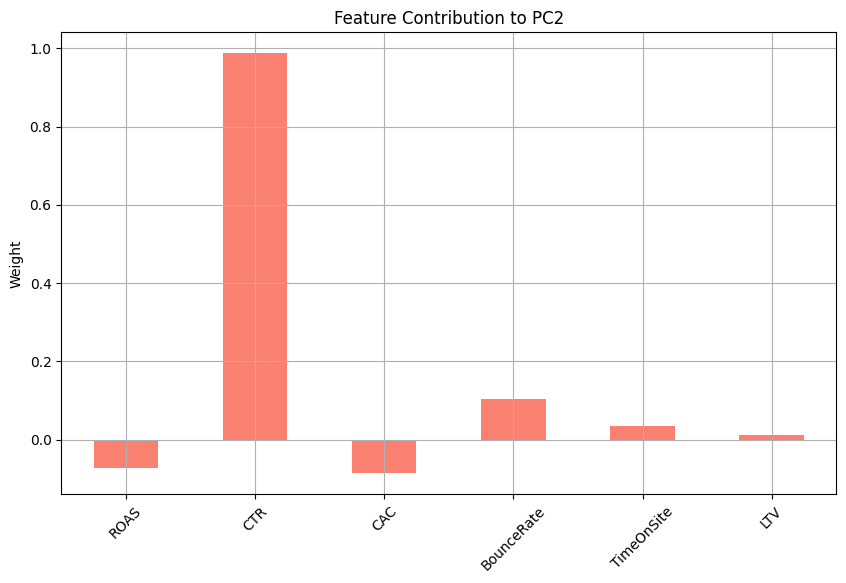

In [22]:
plt.figure(figsize=(10, 6))
components.loc['PC2'].plot(kind='bar', color='salmon')
plt.title('Feature Contribution to PC2')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
components_rounded = components.round(2)

### Interpretation of Feature Contribution to PC2

This bar chart shows how each original feature contributes to the second principal component (PC2).

 *PC1 captures the largest possible variance — the most important pattern in your data.*

*PC2 captures the second-largest variance, uncorrelated with PC1 (i.e. shows a different kind of pattern.*

#### Key insights:
- **CTR (Click-Through Rate)** is the dominant feature for PC2, with a very high positive weight (~0.98). This means that PC2 captures variations in CTR more than any other feature.
- Other features such as **BounceRate**, **TimeOnSite**, and **LTV** have small positive weights, indicating minor influence.
- **ROAS** and **CAC** have small negative contributions, meaning that in the direction of PC2, they vary inversely with CTR.

#### Interpretation:
PC2 can be interpreted as a component primarily driven by CTR performance. If we visualize customers or marketing campaigns in PC-space, those with high PC2 scores are likely characterized by high CTR, whereas those with low PC2 scores likely have low CTR and slightly higher ROAS/CAC.

This helps us segment the data based on user engagement metrics (CTR) separate from the main performance metrics (ROAS, CAC) captured by PC1.


### 🔍 Why is CTR different — and is it still valuable?

In the PCA results, we observe an interesting pattern:

- In **PC1**, CTR has almost zero weight.
- In **PC2**, CTR dominates the entire component.

#### So what’s going on?

📊 **CTR behaves differently from other metrics.**  
Most features — like ROAS, LTV, TimeOnSite, CAC — are **interconnected**. They contribute together to one clear direction: campaign efficiency. This is what **PC1** captures — the main axis of variation in the data.

🧭 **But CTR doesn’t follow this pattern.**  
It doesn’t correlate strongly with those efficiency-related metrics. In other words, CTR doesn’t help distinguish high- from low-performing campaigns along the main efficiency axis.

🙅‍♀️ **That’s why PCA gives CTR almost zero weight in PC1.**  
Including CTR there wouldn’t add meaningful information — it’s simply not part of that main story.

✅ **But that doesn’t mean CTR is useless.**  
Quite the opposite: PCA recognizes that CTR reflects a **separate behavior** — and gives it full space in **PC2**.

So:

- **PC1 = campaign efficiency (ROAS, LTV, CAC, TimeOnSite, etc.)**
- **PC2 = engagement behavior (CTR)**

💡 This separation is actually powerful:  
It tells you that CTR can help detect **engagement anomalies or patterns** that don’t follow the general performance trend. For example:

- High CTR but low conversions?
- Low CTR but high LTV?

These outliers are **insights**, not noise — and PCA helps you find them.

In [24]:
print("PCA Component Loadings (rounded):")
display(components_rounded)

PCA Component Loadings (rounded):


,ROAS,CTR,CAC,BounceRate,TimeOnSite,LTV
PC1,0.45,0.02,-0.45,-0.44,0.45,0.45
PC2,-0.07,0.99,-0.09,0.10,0.03,0.01
PC3,0.33,-0.08,-0.29,0.77,-0.26,0.39
PC4,-0.48,-0.13,-0.50,0.33,0.57,-0.26
PC5,0.61,0.04,0.36,0.27,0.47,-0.46
PC6,-0.29,-0.01,0.58,0.17,0.43,0.60
